In [22]:
from incremental_explainer.tracking.increx  import IncRex
from incremental_explainer.models.model_enum import ModelEnum
from incremental_explainer.models.model_factory import ModelFactory
from incremental_explainer.explainers.d_rise import DRise
from incremental_explainer.utils.video import create_video, save_video
import numpy as np
import time
from PIL import Image

image_locations = [f'./datasets/LASOT/1/{str(i).zfill(8)}.jpg' for i in range(1, 5)]
images = [np.asarray(Image.open(image_location)) for image_location in image_locations]

model = ModelFactory().get_model(ModelEnum.RT_DETR)
explainer = DRise(model)
incRex = IncRex(model, explainer, [0, 1])
frames = incRex.explain_frame_sequence(images)
print('Creating video')
save_video(frames, 'demo_videos/test')
create_video(frames)

  0%|          | 0/4 [00:00<?, ?it/s]

In [20]:
from datasets.dataset_enum import DatasetEnum
import os
from incremental_explainer.tracking.increx  import IncRex
from incremental_explainer.models.model_enum import ModelEnum
from incremental_explainer.models.model_factory import ModelFactory
from incremental_explainer.explainers.d_rise import DRise
from incremental_explainer.utils.video import create_video, save_video
import numpy as np
import time
from PIL import Image

model = ModelFactory().get_model(ModelEnum.RT_DETR)
explainer = DRise(model)

for dataset in DatasetEnum:
    partial_images_paths = []
    dataset_path = os.path.join(".", "datasets", dataset.name)
    for path in os.listdir(dataset_path):
        images = os.listdir(os.path.join(dataset_path, path))
        image_set_name = os.path.join(dataset_path, path).replace("\\", "_").replace(".", "")
        partial_images_paths += [Image.open(os.path.join(dataset_path, path, image).replace('\\', '/')) for image in images]
        incRex = IncRex(model, explainer, [0, 1])
        frames = incRex.explain_frame_sequence(partial_images_paths)
        print('Creating video')
        save_video(frames, f'demo_videos/{image_set_name}')
        #create_video(frames)

  0%|          | 0/701 [01:28<?, ?it/s]


KeyboardInterrupt: 

In [9]:
from incremental_explainer.tracking.increx  import IncRex
from incremental_explainer.models.model_enum import ModelEnum
from incremental_explainer.models.model_factory import ModelFactory
from incremental_explainer.explainers.d_rise import DRise
from incremental_explainer.utils.video import create_video
import numpy as np
import time
from PIL import Image

video_path = 'demo_videos/coverr-a-kitten-yawning-6535-1080p.mp4'

model = ModelFactory().get_model(ModelEnum.RT_DETR)
explainer = DRise(model)
incRex = IncRex(model, explainer, [1])
frames = incRex.explain_video(video_path)
print('Creating video')
save_video(frames, 'demo_videos/1')
# create_video(frames)

SyntaxError: invalid syntax (increx.py, line 49)

In [21]:
from incremental_explainer.tracking.increx  import IncRex
from incremental_explainer.models.model_enum import ModelEnum
from incremental_explainer.models.model_factory import ModelFactory
from incremental_explainer.explainers.d_rise import DRise
from incremental_explainer.utils.video import create_video
import numpy as np


video_path = 'demo_videos/coverr-temp-wx7ago-backpenguin-on-a-skateboard-driving-towards-camera-wearing-punk-rock-clothes-2000s-music-video-style-ultra-detailed-natural-lighting-8k-zoom-in-34bb1e-mp4-1515-1080p.mp4'

model = ModelFactory().get_model(ModelEnum.RT_DETR)
explainer = DRise(model)
incRex = IncRex(model, explainer, [0, 1])
frames = incRex.explain_video(video_path)
print('Creating video')
save_video(frames, 'demo_videos/2')
# create_video(frames)

  0%|          | 0/121 [00:01<?, ?it/s]


KeyboardInterrupt: 

In [ ]:
from incremental_explainer.tracking.increx  import IncRex
from incremental_explainer.models.model_enum import ModelEnum
from incremental_explainer.models.model_factory import ModelFactory
from incremental_explainer.explainers.d_rise import DRise
from incremental_explainer.utils.video import create_video
import numpy as np


video_path = 'demo_videos/35427-407130886_small.mp4'

model = ModelFactory().get_model(ModelEnum.RT_DETR)
explainer = DRise(model)
incRex = IncRex(model, explainer)
frames = incRex.explain_video(video_path)
print('Creating video')
save_video(frames, 'demo_videos/3')
# create_video(frames)

In [ ]:
from incremental_explainer.tracking.increx  import IncRex
from incremental_explainer.models.model_enum import ModelEnum
from incremental_explainer.models.model_factory import ModelFactory
from incremental_explainer.explainers.d_rise import DRise
from incremental_explainer.utils.video import create_video
import numpy as np


video_path = 'demo_videos/145320-786403437_small.mp4'

model = ModelFactory().get_model(ModelEnum.RT_DETR)
explainer = DRise(model)
incRex = IncRex(model, explainer)
frames = incRex.explain_video(video_path)
print('Creating video')
save_video(frames, 'demo_videos/4')
# create_video(frames)

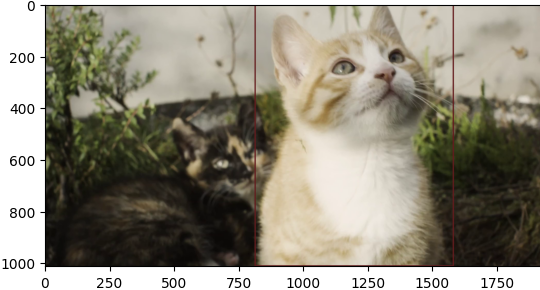

In [43]:
import cv2
import torchvision.transforms as transforms
video_path = 'videos/coverr-a-kitten-yawning-6535-1080p.mp4'
vid_obj  = cv2.VideoCapture(video_path)
frames = []
success, frame = vid_obj.read()
while success:
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    frames.append(frame)
    success, frame = vid_obj.read()

vid_obj.release()
transform = transforms.Compose([
    transforms.ToTensor()
])
results = model.predict(transform(frames[0]).unsqueeze(0))

import matplotlib.pyplot as plt

bounding_box = results[0].bounding_boxes[1]
test = frames[0]
light_blue = (100, 28, 30)

cv2.rectangle(test, (int(bounding_box[0]), int(bounding_box[1])), (int(bounding_box[2]), int(bounding_box[3])), light_blue, thickness=3)

plt.imshow(test)

In [44]:
saliency_map = explainer.create_saliency_map(results[0], test)[1]


100%|██████████| 999/999 [00:29<00:00, 34.13it/s] 


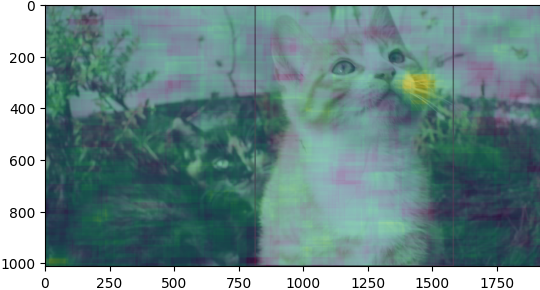

In [45]:
viridis_frame = plt.cm.viridis(saliency_map)
viridis_frame_rgb = viridis_frame[:, :, :3]
alpha = 0.5
frame = cv2.addWeighted(
        test, alpha, (viridis_frame_rgb * 255).astype(np.uint8), 1 - alpha, 0
    )

plt.imshow(frame)

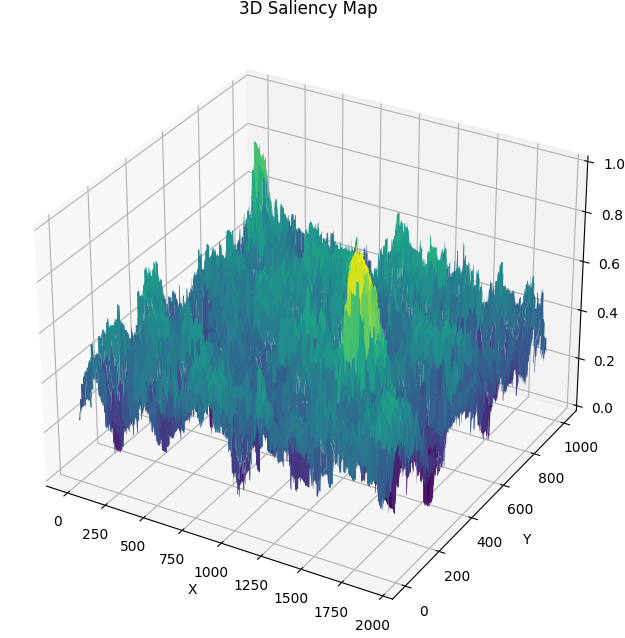

In [46]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Generate meshgrid for x and y coordinates
x, y = np.meshgrid(np.arange(saliency_map.shape[1]), np.arange(saliency_map.shape[0]))

# Plotting in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot 3D surface
ax.plot_surface(x, y, saliency_map, cmap='viridis')

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Saliency')
plt.title('3D Saliency Map')

plt.show()